 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/nn_postprocessing/discrete_crps_test.ipynb#Sebastians-example" data-toc-modified-id="Sebastians-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sebastians example</a></span><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/nn_postprocessing/discrete_crps_test.ipynb#Function-for-real(?)-CRPS" data-toc-modified-id="Function-for-real(?)-CRPS-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Function for real(?) CRPS</a></span></li></ul></li></ul></div>

In [1]:
from utils import crps_normal

Using TensorFlow backend.


Anaconda environment: py36_gpu
Linux 4.4.0-101-generic


In [2]:
mean = 1
sigma = 3
obs = 2

In [3]:
crps_normal(mean, sigma, obs)

0.83284793515116295

In [4]:
from scipy.stats import norm

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np

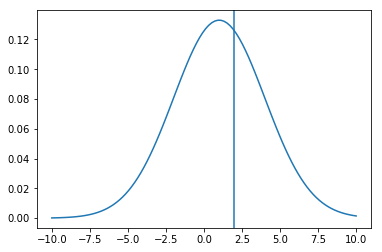

In [7]:
x = np.linspace(-10, 10, 100)
plt.plot(x, norm.pdf(x, mean, sigma))
plt.axvline(obs)

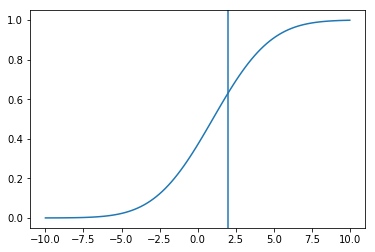

In [8]:
plt.plot(x, norm.cdf(x, mean, sigma))
plt.axvline(obs)

In [9]:
bins = np.arange(-10, 11)
bins

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [10]:
from scipy.stats import binned_statistic

In [11]:
discrete_pdf = binned_statistic(x, norm.pdf(x, mean, sigma), bins=bins)[0]
discrete_pdf

array([ 0.00027361,  0.00084067,  0.00230843,  0.00566494,  0.01242418,
        0.02435222,  0.04265903,  0.06678636,  0.0934483 ,  0.11685937,
        0.13060667,  0.13046003,  0.11646618,  0.09292485,  0.0662632 ,
        0.04222987,  0.02405312,  0.01224403,  0.00557026,  0.00226476])

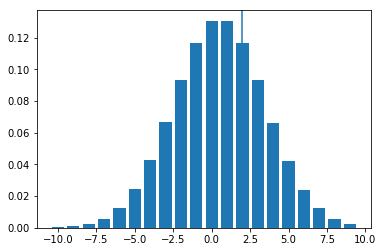

In [12]:
plt.bar(bins[:-1], discrete_pdf)
plt.axvline(obs)

In [13]:
discrete_cdf = binned_statistic(x, norm.cdf(x, mean, sigma), bins=bins)[0]
discrete_cdf

array([  2.18868160e-04,   7.33855671e-04,   2.21518074e-03,
         6.02693689e-03,   1.48015893e-02,   3.28722022e-02,
         6.61658285e-02,   1.21044127e-01,   2.01971698e-01,
         3.08742533e-01,   4.34771928e-01,   5.67865119e-01,
         6.93614298e-01,   7.99910861e-01,   8.80299806e-01,
         9.34691631e-01,   9.67616736e-01,   9.85447581e-01,
         9.94086548e-01,   9.97831012e-01])

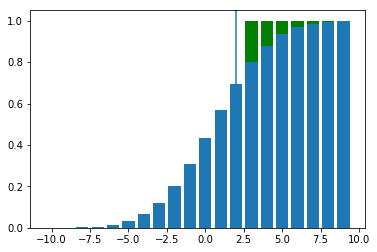

In [14]:
plt.bar(bins[:-1], discrete_cdf)
plt.bar(bins[:-1], np.asarray(bins[:-1] > obs, dtype='float'), color='g', zorder=0.1)
plt.axvline(obs)
plt.savefig('./test_plot')

In [15]:
np.cumsum(discrete_pdf), discrete_cdf

(array([  2.73605201e-04,   1.11428006e-03,   3.42270989e-03,
          9.08764703e-03,   2.15118273e-02,   4.58640472e-02,
          8.85230742e-02,   1.55309436e-01,   2.48757734e-01,
          3.65617100e-01,   4.96223769e-01,   6.26683795e-01,
          7.43149975e-01,   8.36074828e-01,   9.02338032e-01,
          9.44567898e-01,   9.68621016e-01,   9.80865051e-01,
          9.86435315e-01,   9.88700070e-01]),
 array([  2.18868160e-04,   7.33855671e-04,   2.21518074e-03,
          6.02693689e-03,   1.48015893e-02,   3.28722022e-02,
          6.61658285e-02,   1.21044127e-01,   2.01971698e-01,
          3.08742533e-01,   4.34771928e-01,   5.67865119e-01,
          6.93614298e-01,   7.99910861e-01,   8.80299806e-01,
          9.34691631e-01,   9.67616736e-01,   9.85447581e-01,
          9.94086548e-01,   9.97831012e-01]))

In [16]:
discrete_cdf - np.asarray(bins[:-1] > obs, dtype='float')

array([  2.18868160e-04,   7.33855671e-04,   2.21518074e-03,
         6.02693689e-03,   1.48015893e-02,   3.28722022e-02,
         6.61658285e-02,   1.21044127e-01,   2.01971698e-01,
         3.08742533e-01,   4.34771928e-01,   5.67865119e-01,
         6.93614298e-01,  -2.00089139e-01,  -1.19700194e-01,
        -6.53083690e-02,  -3.23832638e-02,  -1.45524189e-02,
        -5.91345226e-03,  -2.16898819e-03])

In [17]:
np.mean((discrete_cdf - np.asarray(bins[:-1] > obs, dtype='float'))**2)

0.060450646164963498

## Sebastians example

In [18]:
probs = np.array([0.14935065, 0.15097403, 0.04707792, 0.13149351, 0.10064935, 0.08116883,
                  0.11363636, 0.02110390, 0.09902597, 0.10551948])

In [19]:
probs.sum()

1.0

In [20]:
obs = 4.577418

In [21]:
bin_edges = np.arange(0, 11, 1)

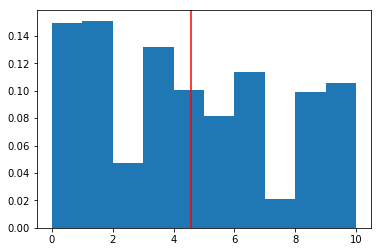

In [22]:
plt.bar(bin_edges[:-1] + 0.5, probs, width=1)
plt.axvline(obs, c='r')
plt.show()

In [23]:
cum_probs = np.cumsum(probs)

In [24]:
cum_obs = np.array([0, 1])
cum_obs_bin_edges = np.array([0, obs, 10])

<Container object of 2 artists>

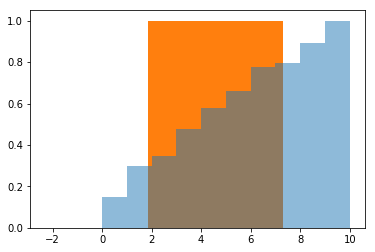

In [25]:
plt.bar(bin_edges[:-1] + 0.5, cum_probs, width=1, alpha=0.5)
plt.bar(cum_obs_bin_edges[:-1], cum_obs, width=np.diff(cum_obs_bin_edges), 
       zorder =0.1)

In [26]:
bin_obs = np.array((bin_edges[:-1] < obs) & (bin_edges[1:] > obs), dtype=int)

In [27]:
bin_obs

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

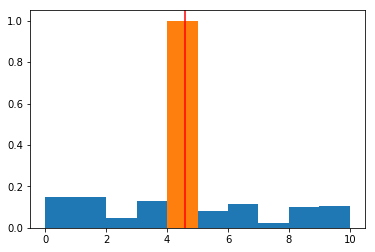

In [28]:
plt.bar(bin_edges[:-1] + 0.5, probs, width=1)
plt.bar(bin_edges[:-1] + 0.5, bin_obs, width=1)
plt.axvline(obs, c='r')
plt.show()

In [29]:
rps = np.sum((probs - bin_obs) ** 2)
rps

0.91432471903567214

In [30]:
cum_bin_obs = np.cumsum(bin_obs)

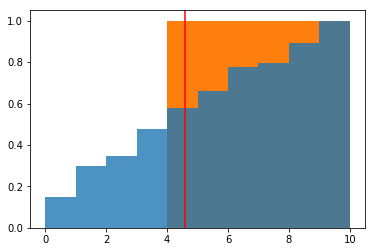

In [31]:
plt.bar(bin_edges[:-1] + 0.5, cum_probs, width=1, alpha=0.8)
plt.bar(bin_edges[:-1] + 0.5, cum_bin_obs, width=1, zorder=0.1)
plt.axvline(obs, c='r')
plt.show()

In [32]:
approx_crps = np.sum((cum_probs - cum_bin_obs) ** 2)

In [33]:
approx_crps

0.85831822487982823

In [34]:
insert_idx = np.where(obs<bin_edges)[0][0]

In [35]:
new_bin_edges = np.insert(np.array(bin_edges, dtype=float), insert_idx, obs)
new_bin_edges

array([  0.      ,   1.      ,   2.      ,   3.      ,   4.      ,
         4.577418,   5.      ,   6.      ,   7.      ,   8.      ,
         9.      ,  10.      ])

In [36]:
new_probs = np.insert(probs, insert_idx, probs[insert_idx-1])

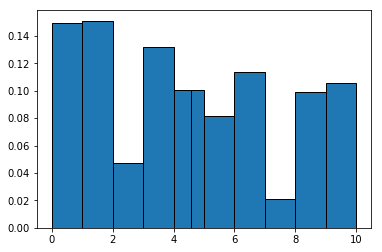

In [37]:
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), new_probs, 
        width=np.diff(new_bin_edges), linewidth=1, edgecolor='k')
plt.show()

In [38]:
new_bin_obs = np.array((new_bin_edges[:-1] <= obs) & (new_bin_edges[1:] > obs), dtype=int)

In [39]:
new_bin_edges[:-1], obs,(new_bin_edges[:-1] < obs)

(array([ 0.      ,  1.      ,  2.      ,  3.      ,  4.      ,  4.577418,
         5.      ,  6.      ,  7.      ,  8.      ,  9.      ]),
 4.577418,
 array([ True,  True,  True,  True,  True, False, False, False, False,
        False, False], dtype=bool))

In [40]:
new_bin_obs

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [41]:
new_cum_bin_obs = np.cumsum(new_bin_obs)
new_cum_probs = np.cumsum(new_probs * np.diff(new_bin_edges))

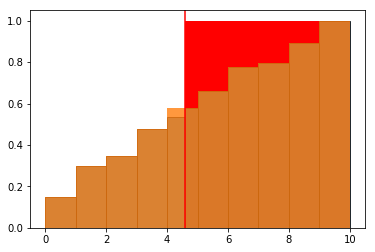

In [42]:
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), new_cum_probs, 
        width=np.diff(new_bin_edges), linewidth=1, edgecolor='k', alpha=0.8)
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), new_cum_bin_obs, 
        width=np.diff(new_bin_edges), linewidth=1, color='r', zorder=0.1)
plt.bar(bin_edges[:-1] + 0.5, cum_probs, width=1, alpha=0.8)
plt.axvline(obs, c='r')
plt.show()

In [43]:
crps = np.sum((((new_cum_probs - new_cum_bin_obs) * np.diff(new_bin_edges)) ** 2) )

In [44]:
crps

0.80925530861832939

In [45]:
np.sum(((new_cum_probs - new_cum_bin_obs) **2 * np.diff(new_bin_edges)**2)) 

0.80925530861832939

In [46]:
(cum_probs - cum_bin_obs) ** 2

array([  2.23056167e-02,   9.01949134e-02,   1.20688566e-01,
         2.29341484e-01,   1.76782020e-01,   1.15114793e-01,
         5.09176292e-02,   4.18388411e-02,   1.11343607e-02,
         1.23259516e-32])

In [47]:
np.diff(new_bin_edges)

array([ 1.      ,  1.      ,  1.      ,  1.      ,  0.577418,  0.422582,
        1.      ,  1.      ,  1.      ,  1.      ,  1.      ])

In [51]:
a = np.concatenate(([0], new_cum_probs))

In [52]:
fix = (a[:-1] + a[1:]) / 2

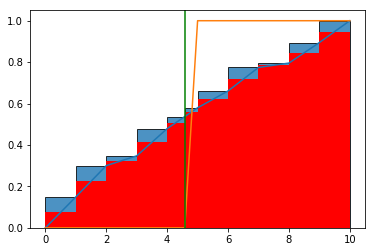

In [53]:
plt.plot(new_bin_edges, np.concatenate(([0], new_cum_probs)))
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), new_cum_probs, 
        width=np.diff(new_bin_edges), linewidth=1, edgecolor='k', alpha=0.8)
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), fix, 
        width=np.diff(new_bin_edges), linewidth=1, color='r', zorder=2)
plt.plot(new_bin_edges, np.concatenate(([0], new_cum_bin_obs)))
plt.axvline(obs, c='g')

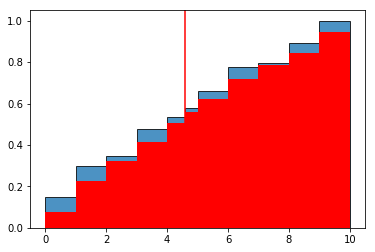

In [54]:
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), new_cum_probs, 
        width=np.diff(new_bin_edges), linewidth=1, edgecolor='k', alpha=0.8)
plt.bar(new_bin_edges[:-1] + 0.5 * np.diff(new_bin_edges), fix, 
        width=np.diff(new_bin_edges), linewidth=1, color='r', zorder=2)
plt.axvline(obs, c='r')
plt.show()

In [55]:
crps = np.sum((((fix - new_cum_bin_obs)  ) ** 2) *np.diff(new_bin_edges))

In [56]:
crps

0.86032034780350819

### Function for real(?) CRPS

In [57]:
# Test data
preds = np.stack([probs, probs])

In [58]:
preds.shape, preds   # [sample, bin]

((2, 10),
 array([[ 0.14935065,  0.15097403,  0.04707792,  0.13149351,  0.10064935,
          0.08116883,  0.11363636,  0.0211039 ,  0.09902597,  0.10551948],
        [ 0.14935065,  0.15097403,  0.04707792,  0.13149351,  0.10064935,
          0.08116883,  0.11363636,  0.0211039 ,  0.09902597,  0.10551948]]))

In [95]:
targets = np.array([obs, 9.0000])

In [60]:
targets.shape, targets

((2,), array([ 4.577418,  9.      ]))

In [61]:
a = np.repeat(np.atleast_2d(bin_edges), targets.shape[0], axis=0)
a.shape

(2, 11)

In [62]:
a - targets

ValueError: operands could not be broadcast together with shapes (2,11) (2,) 

In [72]:
b = a - targets
b[b < 0] = 999

In [73]:
b

array([[  9.99000000e+02,   9.99000000e+02],
       [  9.99000000e+02,   9.99000000e+02],
       [  9.99000000e+02,   9.99000000e+02],
       [  9.99000000e+02,   9.99000000e+02],
       [  9.99000000e+02,   9.99000000e+02],
       [  4.22582000e-01,   9.99000000e+02],
       [  1.42258200e+00,   9.99000000e+02],
       [  2.42258200e+00,   9.99000000e+02],
       [  3.42258200e+00,   9.99000000e+02],
       [  4.42258200e+00,   9.99000000e+02],
       [  5.42258200e+00,   9.00000000e-01]])

In [76]:
insert_idx = np.argmin(b, axis=0)

In [77]:
insert_idx

array([ 5, 10])

In [86]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [91]:
new_bin_edges = np.insert(np.array(a, dtype=float), insert_idx, np.atleast_2d(targets), axis=1)

In [92]:
new_bin_edges

array([[  0.      ,   1.      ,   2.      ,   3.      ,   4.      ,
          4.577418,   5.      ,   6.      ,   7.      ,   8.      ,
          9.      ,   9.1     ,  10.      ],
       [  0.      ,   1.      ,   2.      ,   3.      ,   4.      ,
          4.577418,   5.      ,   6.      ,   7.      ,   8.      ,
          9.      ,   9.1     ,  10.      ]])

In [97]:
c = np.array([np.insert(np.array(bin_edges, dtype=float), insert_idx[i], targets[i]) 
              for i in range(targets.shape[0])])

In [98]:
c

array([[  0.      ,   1.      ,   2.      ,   3.      ,   4.      ,
          4.577418,   5.      ,   6.      ,   7.      ,   8.      ,
          9.      ,  10.      ],
       [  0.      ,   1.      ,   2.      ,   3.      ,   4.      ,
          5.      ,   6.      ,   7.      ,   8.      ,   9.      ,
          9.1     ,  10.      ]])

In [99]:
d = np.array([np.insert(preds[i], insert_idx[i], preds[i, insert_idx[i]-1]) 
              for i in range(targets.shape[0])])

In [100]:
d

array([[ 0.14935065,  0.15097403,  0.04707792,  0.13149351,  0.10064935,
         0.10064935,  0.08116883,  0.11363636,  0.0211039 ,  0.09902597,
         0.10551948],
       [ 0.14935065,  0.15097403,  0.04707792,  0.13149351,  0.10064935,
         0.08116883,  0.11363636,  0.0211039 ,  0.09902597,  0.10551948,
         0.10551948]])

In [107]:
new_bin_obs = np.array([(c[i, :-1] <= targets[i]) & (c[i, 1:] > targets[i]) 
              for i in range(targets.shape[0])], dtype=int)
new_bin_obs

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [114]:
d = d * np.diff(c, axis=1)

In [115]:
d

array([[ 0.14935065,  0.15097403,  0.04707792,  0.13149351,  0.05811675,
         0.0425326 ,  0.08116883,  0.11363636,  0.0211039 ,  0.09902597,
         0.10551948],
       [ 0.14935065,  0.15097403,  0.04707792,  0.13149351,  0.10064935,
         0.08116883,  0.11363636,  0.0211039 ,  0.09902597,  0.01055195,
         0.09496753]])

In [116]:
new_cum_bin_obs = np.cumsum(new_bin_obs, axis=1)
new_cum_probs = np.cumsum(d, axis=1)

In [117]:
new_cum_bin_obs, new_cum_probs

(array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]),
 array([[ 0.14935065,  0.30032468,  0.3474026 ,  0.47889611,  0.53701286,
          0.57954546,  0.66071429,  0.77435065,  0.79545455,  0.89448052,
          1.        ],
        [ 0.14935065,  0.30032468,  0.3474026 ,  0.47889611,  0.57954546,
          0.66071429,  0.77435065,  0.79545455,  0.89448052,  0.90503247,
          1.        ]]))

In [112]:
new_cum_probs = (new_cum_probs.T / new_cum_probs[:, -1]).T
new_cum_probs

array([[ 0.13569322,  0.27286136,  0.31563422,  0.43510325,  0.52654868,
         0.61799411,  0.69174042,  0.79498525,  0.8141593 ,  0.90412979,
         1.        ],
       [ 0.13509545,  0.27165933,  0.31424376,  0.4331865 ,  0.52422908,
         0.59765052,  0.70044053,  0.71953011,  0.80910426,  0.90455213,
         1.        ]])

In [123]:
f = np.concatenate((np.zeros((new_cum_probs.shape[0], 1)), new_cum_probs), axis=1)

In [124]:
fix = (a[:-1] + a[1:]) / 2

array([[ 0.        ,  0.14935065,  0.30032468,  0.3474026 ,  0.47889611,
         0.53701286,  0.57954546,  0.66071429,  0.77435065,  0.79545455,
         0.89448052,  1.        ],
       [ 0.        ,  0.14935065,  0.30032468,  0.3474026 ,  0.47889611,
         0.57954546,  0.66071429,  0.77435065,  0.79545455,  0.89448052,
         0.90503247,  1.        ]])

In [64]:
import pdb
def maybe_correct_crps(preds, targets, bin_edges):
    #pdb.set_trace()
    #Convert input arrays
    preds = np.array(np.atleast_2d(preds), dtype='float')
    targets = np.array(np.atleast_1d(targets), dtype='float')
    
    # preds [sample, bins]
    # Find insert index
    pdb.set_trace
    mat_bins = np.repeat(np.atleast_2d(bin_edges), targets.shape[0], axis=0)
    b = mat_bins.T - targets
    b[b < 0] = 999
    insert_idxs = np.argmin(b, axis=0)
    
    # Insert 
    ins_bin_edges = np.array([np.insert(np.array(bin_edges, dtype=float), 
                                        insert_idxs[i], targets[i]) 
                              for i in range(targets.shape[0])])
    ins_preds = np.array([np.insert(preds[i], insert_idxs[i], preds[i, insert_idxs[i]-1]) 
                          for i in range(targets.shape[0])])
    
    # Get obs
    bin_obs = np.array([(ins_bin_edges[i, :-1] <= targets[i]) & 
                        (ins_bin_edges[i, 1:] > targets[i]) 
                        for i in range(targets.shape[0])], dtype=int)
    
    # Cumsum with weights
    ins_preds *= np.diff(ins_bin_edges, axis=1)
    cum_bin_obs = np.cumsum(bin_obs, axis=1)
    cum_probs = np.cumsum(ins_preds, axis=1)
    cum_probs = (cum_probs.T / cum_probs[:, -1]).T
    
    # Get adjusted preds
    adj_cum_probs = np.concatenate((np.zeros((cum_probs.shape[0], 1)), cum_probs), axis=1)
    adj_cum_probs = (adj_cum_probs[:, :-1] + adj_cum_probs[:, 1:]) / 2
    
    # Compute CRPS
    crps = np.mean(np.sum(((adj_cum_probs - cum_bin_obs) ** 2) * 
                          np.diff(ins_bin_edges, axis=1), axis=1))
    return crps

In [94]:
maybe_correct_crps(preds, targets, bin_edges)

1.8521755276904965

In [102]:
def maybe_correct_crps2(preds, targets, bin_edges):
    #pdb.set_trace()
    #Convert input arrays
    preds = np.array(np.atleast_2d(preds), dtype='float')
    targets = np.array(np.atleast_1d(targets), dtype='float')
    
    # preds [sample, bins]
    # Find insert index
    pdb.set_trace
    mat_bins = np.repeat(np.atleast_2d(bin_edges), targets.shape[0], axis=0)
    b = mat_bins.T - targets
    b[b < 0] = 999
    insert_idxs = np.argmin(b, axis=0)
    
    # Insert 
    ins_bin_edges = np.array([np.insert(np.array(bin_edges, dtype=float), 
                                        insert_idxs[i], targets[i]) 
                              for i in range(targets.shape[0])])
    ins_preds = np.array([np.insert(preds[i], insert_idxs[i], preds[i, insert_idxs[i]-1]) 
                          for i in range(targets.shape[0])])
    
    # Get obs
    bin_obs = np.array([(ins_bin_edges[i, :-1] <= targets[i]) & 
                        (ins_bin_edges[i, 1:] > targets[i]) 
                        for i in range(targets.shape[0])], dtype=int)
    
    # Cumsum with weights
    ins_preds *= np.diff(ins_bin_edges, axis=1)
    cum_bin_obs = np.cumsum(bin_obs, axis=1)
    cum_probs = np.cumsum(ins_preds, axis=1)
    cum_probs = (cum_probs.T / cum_probs[:, -1]).T
    
    # Get adjusted preds
    adj_cum_probs = np.concatenate((np.zeros((cum_probs.shape[0], 1)), cum_probs), axis=1)
    print(adj_cum_probs.shape, cum_bin_obs.shape)
    sq_list = []
    
    for i in range(cum_bin_obs.shape[1]):
        x_l = np.abs(cum_bin_obs[:, i] - adj_cum_probs[:, i])
        x_r = np.abs(cum_bin_obs[:, i] - adj_cum_probs[:, i + 1])
        sq = 1./3. * (x_l ** 2 + x_l * x_r + x_r ** 2)
        if np.isnan(np.mean(sq)):
            pdb.set_trace()
        sq_list.append(sq)
    crps = np.sum(np.array(sq_list).T * np.diff(ins_bin_edges, axis=1), axis=1)
    return crps

In [103]:
maybe_correct_crps2(preds, targets, bin_edges)

(2, 12) (2, 11)


array([ 0.86933767,  2.85365808])

In [97]:
np.nanmax([np.nan, 1])

1.0